# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: 
Forestry Parcel – Classification: https://www.stlouis-mo.gov/data/datasets/distribution.cfm?id=36 
Parcel and Owner Information: https://www.stlouis-mo.gov/data/datasets/distribution.cfm?id=83 (Note: Only one table from this database will be used – “Prcl”.  Additionally, this table can be shortened once other wards are removed. Also I was able to convert it into a CSV and remove the other wards.)
Information about Data Sets:
These data sets can be linked by parcel number, which is a unique identifier for each property in the area.
Additionally, here is there a library of meanings for the data sets: https://www.stlouis-mo.gov/data/vocabularies/index.cfm


Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

prcl = pd.read_csv("Prcl_7th_Ward.csv") #Note I pre-filtered the original database using Excel to only be properties in the 7th Ward, since the file was too large with all the wards.
forestry = pd.read_csv("forestry-maintenance-properties.csv") #This dataframe has information on the properties that the city considers vacant and mows their lawns, I can connect it with the previous dataframe on PARCELID and AsrParcelId in PRCL

#Note I'm going to make a merge of my two data sets into one to help:
df = prcl.merge(forestry, how="left", left_on='AsrParcelId', right_on='PARCELID') 


C:\Users\LC Harrison Sand\AppData\Local\Temp\ipykernel_13552\3341692072.py:6: DtypeWarning: Columns (9,27,97,107,171) have mixed types. Specify dtype option on import or set low_memory=False.
  prcl = pd.read_csv("Prcl_7th_Ward.csv") #Note I pre-filtered the original database using Excel to only be properties in the 7th Ward, since the file was too large with all the wards.


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [10]:
#I'm not going to combine the two datbases yet and look at them each. This is to help ensure that when I merge them that I am not missing information, and also to help me with nulls.
display(prcl.info())
display(forestry.info())
display(prcl.shape) #Using .shape to look at columns and rows of databases.
display(forestry.shape)
print(prcl.columns.to_list()) #There are many columns and I will need to drop many of them and only keep the ones that are useful. Note I had to add .to_list() to stop VSC from truncating the results. 
display(forestry.columns) #I'm most likely going to be concerned with PARCELID and CATEGORY. PARCELID should match with AsrParcelId on the prcl dataframe.
display(prcl.isnull().sum()) #Lists nulls by column for prcl
display(prcl.isnull().sum().sum()) #Sums all nulls for full prcl df
display(forestry.isnull().sum()) #Lists nulls by column for forestry
display(forestry.isnull().sum().sum()) #Sums all nulls for full forestry df


#While this would normally be a data manipulation step, I am going to drop some of the columns to make this a little easier to visualize and work with. 
# Because there are so many columns to drop, I am going to specify which ones to keep rather than to drop, otherwise it would be a lot of work!
#I might get rid of more in DataManipulation steps.

prcl = prcl.loc[:, ['AsrParcelId','LowAddrNum' , 'HighAddrNum', 'StPreDir',	'StName',	'StType' , 'OwnerName',	'OwnerName2',	'OwnerAddr',	'OwnerCity' ,	'OwnerState',	'OwnerCountry',	'OwnerZIP' ,	'OwnerRank', 'IsAbatedProperty', 'VacantLot', 'LandArea', 'TaxBalDue', 'VacBldgYear', 'Ward20',	'Precinct20', 'ZIP', 'OwnerOcc']
] #This updates prcl to only include these columns.
# prcl.to_csv('prcl updated.csv', index=False)  #I ran this once, it helps me to have a CSV that I can open up and examine on the fly.
display(prcl.shape) #This and the next 2 lines let me see some decriptors of prcl after I dropped most of the columns.
display(prcl.columns)
display(prcl.isnull().sum())

#Some summary descriptions of the combined prcl and forestry data on a Left Join
display(df.shape)
display(df.isnull().sum())
display(df.isnull().sum().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Columns: 187 entries, CityBlock to OwnerUpdate
dtypes: bool(7), float64(20), int64(100), object(60)
memory usage: 11.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26527 entries, 0 to 26526
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CATEGORY         26527 non-null  object
 1   HANDLE           26527 non-null  int64 
 2   PARCELID         26527 non-null  int64 
 3   PROPERTYADDRESS  26481 non-null  object
dtypes: int64(2), object(2)
memory usage: 829.1+ KB


None

(8526, 187)

(26527, 4)

['CityBlock', 'Parcel', 'OwnerCode', 'AsrParcelId', 'ColParcelId', 'ColCityBlock', 'ColParcel', 'ParcelId', 'PrimAddrRecNum', 'AddrType', 'LowAddrNum', 'LowAddrSuf', 'HighAddrNum', 'HighAddrSuf', 'NLC', 'Parity', 'StPreDir', 'StName', 'StType', 'StSufDir', 'StdUnitNum', 'OwnerName', 'OwnerName2', 'OwnerAddr', 'OwnerCity', 'OwnerState', 'OwnerCountry', 'OwnerZIP', 'OwnerRank', 'LegalDesc1', 'LegalDesc2', 'LegalDesc3', 'LegalDesc4', 'LegalDesc5', 'AsrClassCode', 'PropertyClassCode', 'AsrLandUse1', 'AsrLanduse2', 'IsAbatedProperty', 'AbatementType', 'AbatementStartYear', 'AbatementEndYear', 'RedevPhase', 'RedevYearEnd', 'RedevPhase2', 'RedevYearEnd2', 'VacantLot', 'SpecBusDist', 'SpecBusDist2', 'SpecBusDist3', 'TIFDist', 'LendingAgcy', 'Condominium', 'NbrOfUnitsSource', 'NbrOfUnits', 'NbrOfApts', 'Frontage', 'LandArea', 'RecDailyDate', 'RecDailyNum', 'RecBookNum', 'RecPageNum', 'AsdLand', 'AsdImprove', 'AsdTotal', 'AsdResLand', 'AsdResImprove', 'AsdComLand', 'AsdComImprove', 'AsdAgrLand',

Index(['CATEGORY', 'HANDLE', 'PARCELID', 'PROPERTYADDRESS'], dtype='object')

CityBlock         0
Parcel            0
OwnerCode         0
AsrParcelId       0
ColParcelId       0
               ... 
Parcel9           0
OwnerOcc       4448
FirstDate         0
LastDate          0
OwnerUpdate     110
Length: 187, dtype: int64

np.int64(147791)

CATEGORY            0
HANDLE              0
PARCELID            0
PROPERTYADDRESS    46
dtype: int64

np.int64(46)

(8526, 23)

Index(['AsrParcelId', 'LowAddrNum', 'HighAddrNum', 'StPreDir', 'StName',
       'StType', 'OwnerName', 'OwnerName2', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerCountry', 'OwnerZIP', 'OwnerRank',
       'IsAbatedProperty', 'VacantLot', 'LandArea', 'TaxBalDue', 'VacBldgYear',
       'Ward20', 'Precinct20', 'ZIP', 'OwnerOcc'],
      dtype='object')

AsrParcelId            0
LowAddrNum             0
HighAddrNum            0
StPreDir            7963
StName                 0
StType                 0
OwnerName              0
OwnerName2          7427
OwnerAddr            118
OwnerCity            119
OwnerState           236
OwnerCountry        3636
OwnerZIP             119
OwnerRank           7510
IsAbatedProperty       0
VacantLot              0
LandArea               0
TaxBalDue              0
VacBldgYear            0
Ward20                 0
Precinct20             0
ZIP                    0
OwnerOcc            4448
dtype: int64

(8526, 191)

CityBlock             0
Parcel                0
OwnerCode             0
AsrParcelId           0
ColParcelId           0
                   ... 
OwnerUpdate         110
CATEGORY           7476
HANDLE             7476
PARCELID           7476
PROPERTYADDRESS    7486
Length: 191, dtype: int64

np.int64(177705)

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

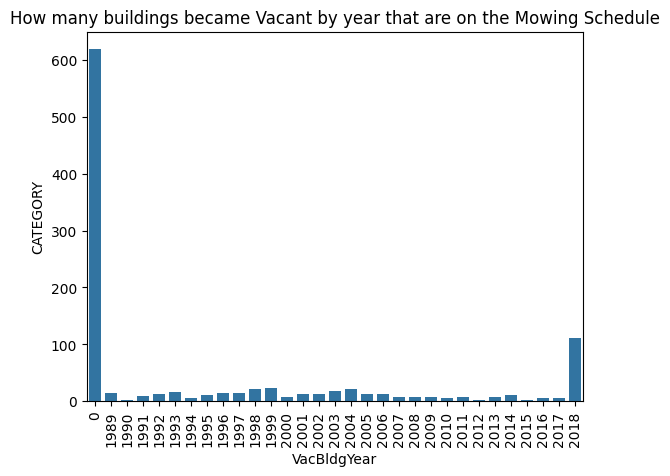

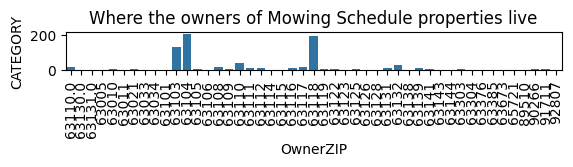

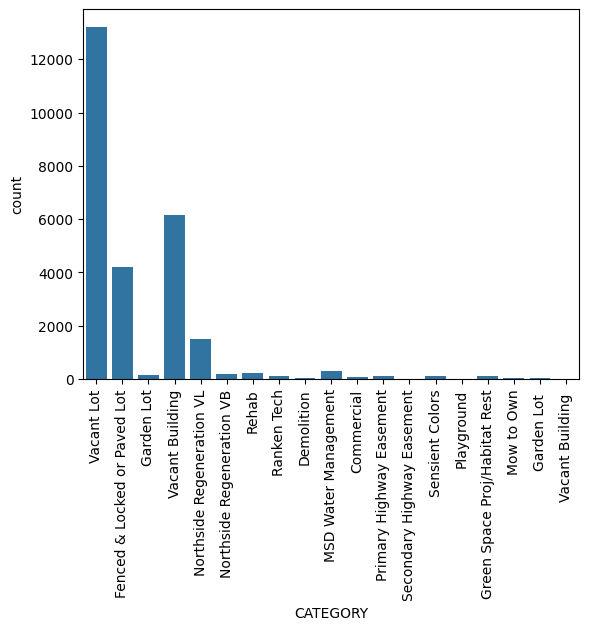

In [11]:
'''
I'm going to use seaborn, since it is normally easier.
Additionally, I will not need to do many visualizations, since much of my data is qualitative rather than quantitative and the visulizations will help less
at this step, but can be useful later in the process.

Plots to get a general idea of data:
Mowing schedule locations vs zip codes of owners
Mowing schedule locations by years that they became vacant
Counts of mowing schedule categories
'''

#Below gives graph of when buildings became vacant that are on the mowing list
cat_per_year = df.groupby('VacBldgYear')['CATEGORY'].count().reset_index() #This is giving me a data set with a count of 'CATEGORY', since it is a string value.
sns.barplot(x='VacBldgYear', y="CATEGORY", data=cat_per_year, estimator='sum').set(title="How many buildings became Vacant by year that are on the Mowing Schedule")
plot.xticks(rotation=90)
plot.show()

#Below graph for Zipcodes of owners that have locations on the mowing list.
cat_per_ownerzip = df.groupby('OwnerZIP')['CATEGORY'].count().reset_index() #Creating a group that allows me to have a count of mowing properties for OwnerZips.
more_than_owners = 2 #Edit to change graph
owner_zip_mow = cat_per_ownerzip.loc[cat_per_ownerzip['CATEGORY'] > more_than_owners]
# plot.figure(figsize=(120, 8)) #IF you change more_than_owners to a low value you might need this.
sns.barplot(x='OwnerZIP', y="CATEGORY", data=owner_zip_mow, estimator='sum').set(title="Where the owners of Mowing Schedule properties live")
plot.subplots_adjust(bottom=0.8)
plot.xticks(rotation=90)
plot.show()

#Below graph of how many of each category are in forestry data.
sns.countplot(x='CATEGORY', data=forestry)
plot.xticks(rotation=90)
plot.show()



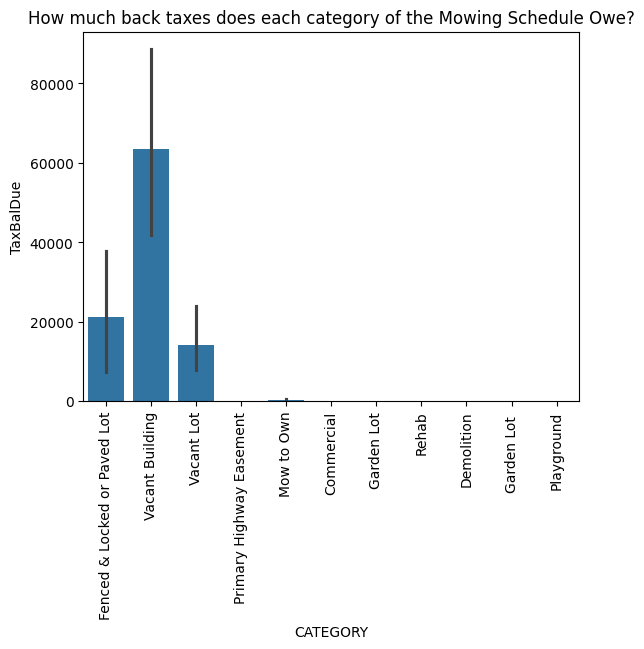

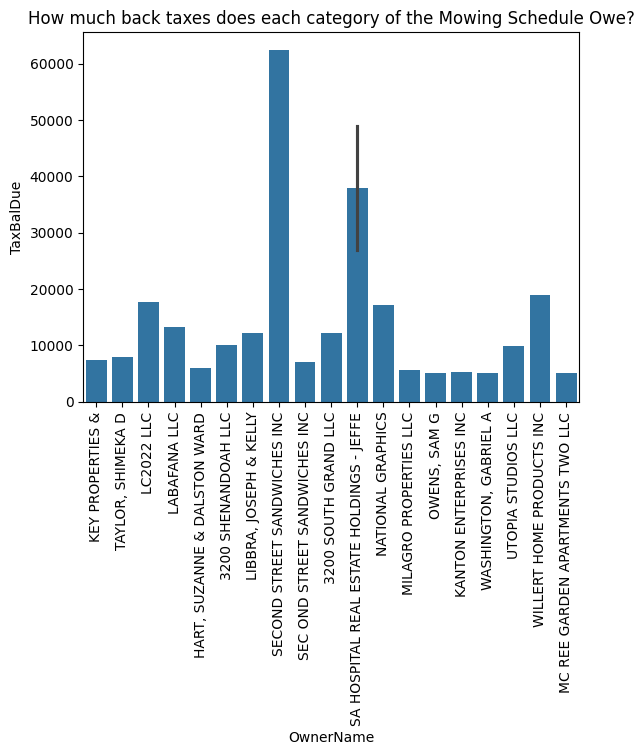

In [12]:
#Graphs for helping me find outliers for taxes due

df['TaxBalDue'] = df['TaxBalDue'].replace(',','', regex=True) #Gets rid of commas to allow me to change it to a float - found here: https://saturncloud.io/blog/how-to-handle-the-pandas-valueerror-could-not-convert-string-to-float/
df['TaxBalDue'] = df['TaxBalDue'].astype('float') #Had to convert this to numbers, since it was not typed as a numeric values
sns.barplot(x='CATEGORY', y="TaxBalDue", data=df, estimator='sum').set(title="How much back taxes does each category of the Mowing Schedule Owe?")
plot.xticks(rotation=90)
plot.show()

more_than = 5000
owners_owe_df = df.loc[df['TaxBalDue'] > more_than]
sns.barplot(x='OwnerName', y="TaxBalDue", data=owners_owe_df, estimator='sum').set(title="How much back taxes does each category of the Mowing Schedule Owe?")
plot.xticks(rotation=90)
plot.show()

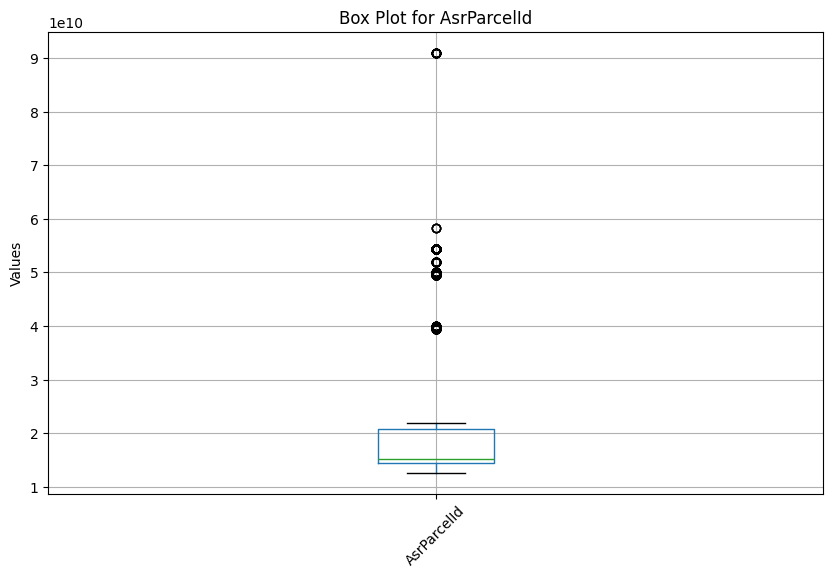

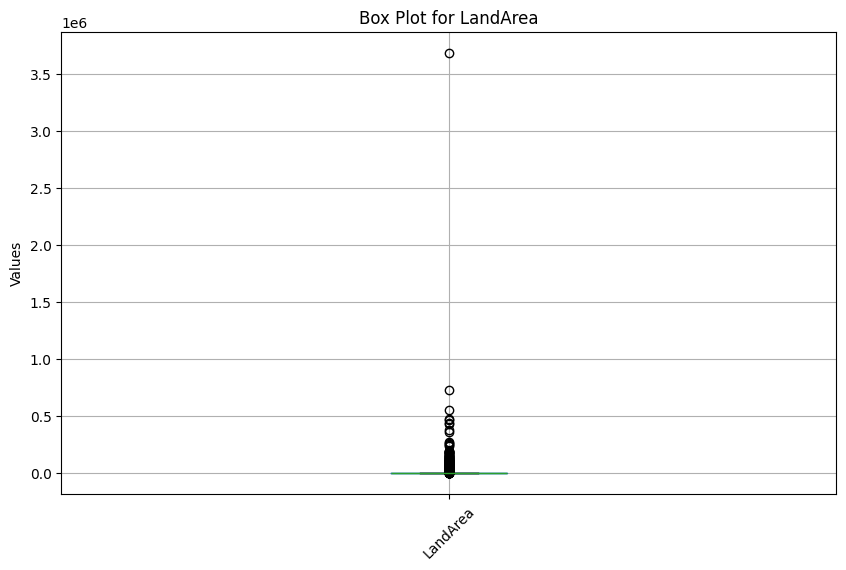

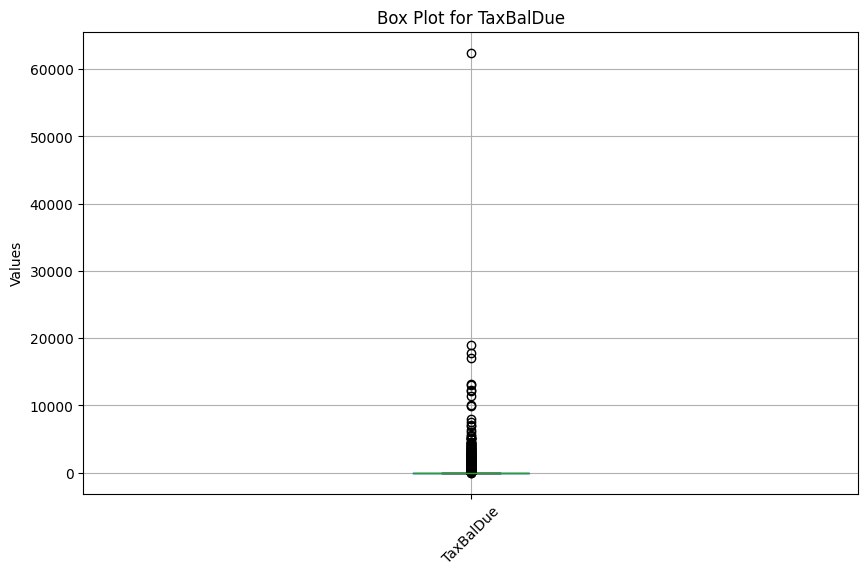

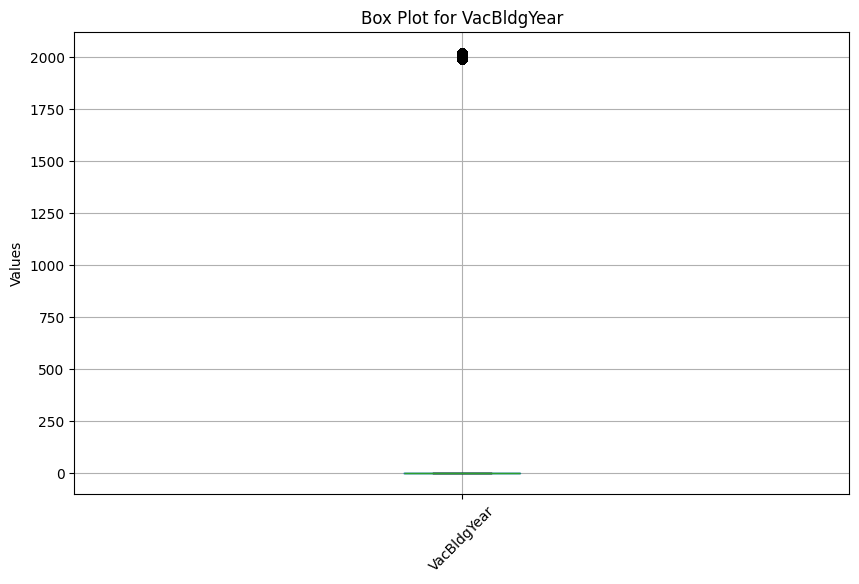

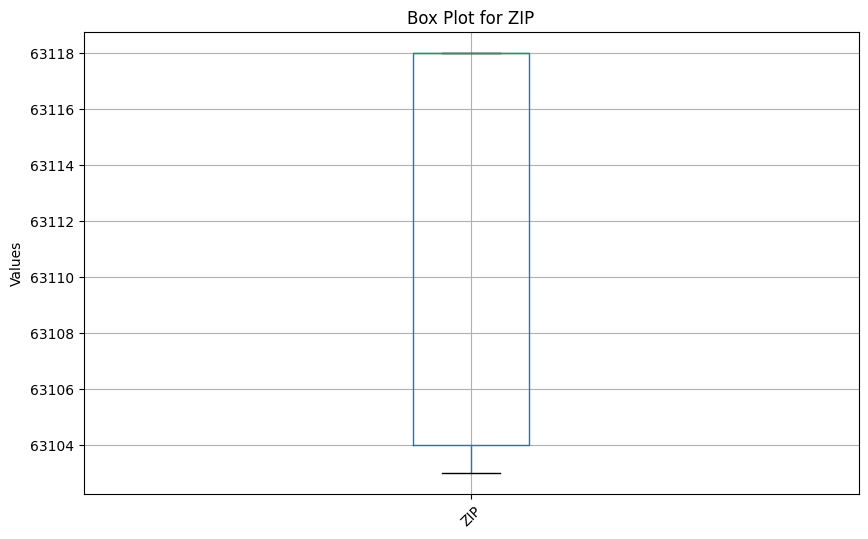

In [ ]:
#Looking for more outliers:

col_names = ['AsrParcelId', 'LandArea', 'TaxBalDue', 'VacBldgYear', 'ZIP']

# Below graphs columns in box plot to look for outliers
for col_name in col_names:
    plot.figure(figsize=(10, 6))
    # Use DataFrame.boxplot to plot a boxplot for the specific column
    df.boxplot(column=col_name)
    plot.title(f'Box Plot for {col_name}')
    plot.ylabel('Values')
    plot.xticks(rotation=45)
    plot.show()

#Looking at top values for ASR, because there might be outliers
top_100_asr = df.sort_values(by='AsrParcelId', ascending=False).head(100)
display(top_100_asr)

#After looking at this, it looks like these are identifiers and some properties identifiers like government buildings just have higher values as an id.

##Looks like land area has an outlier. Let's try to figure out what is going on:

top_10_land = df.sort_values(by='LandArea', ascending=False).head(10)
display(top_10_land)
#It looks like it is St. Louis University, which makes sense since St. Louis University's South Campus is located in this ward.

#TaxesDue might also have some outliers
#This will show the top 10 rows with the largest TaxBalDue
top_10_taxes = df.sort_values(by='TaxBalDue', ascending=False).head(10)
display(top_10_taxes)

#Second Street Sandwiches Inc. is an outlier with almost 62469.76 in taxes due and 5x higher than the next highest number. I will probably drop this.

#Vacant Building Year has many 0s listed instead of nulls, will need to fix this.

#ZIP is fine, no outliers.



## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

    I think the number of Zipcodes that owners represent, I might have to see if there is a library that works with geographic data well. 

2. Do you have any concerns about your dataset? 

    No huge concerns, I will have to make sure I know the meanings of the different categories in Forestry DataFrame and will need to see if Vacant Lot and Forestry match.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

    The issue in #1 and I will have to make 0 into null for the year of vacant lots - I will need to see if they are vacant or just what is listed if they are not vacant. I will also have to double check which columns I actually need. Additionally, some ZIP codes appear to be 5 + 4.